# Exploratory Data Analysis Project
Steps to follow:
- Select a large real-world dataset from Kaggle
- Perform data preparation & cleaning using Pandas & Numpy
- Perform exploratory analysis & visualization using Matplotib & Seaborn
- Ask & answer questions about the data a Jupyter notebook
- Summarize your inferences & write a conclusion
- Document,publish and present your Jupyter notebook online

# Wine Reviews Data Analysis
   TODO - talk about EDA
   
   TODO - talk about the dataset (source,what it contains,how it will useful):
- Kaggle
- Information about wine reviews
- help for select wine

In [38]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt

## Download The Data

In [3]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
dataset_url = 'https://www.kaggle.com/datasets/zynicide/wine-reviews'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  df


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews


In [40]:
data_file = 'wine1.csv'
data_file1 = 'wine2.csv'

# Combined Data

In [43]:
df1 = pd.read_csv('wine1.csv')
df2 = pd.read_csv('wine2.csv')
df_mer = df1.merge(df2, how='outer')


# Data Preparetion And Cleaning:
- Load the file using Pandas
- Look at some infomation about the data & the columns
- Fix any missing or incorrect values

In [45]:
df1.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [46]:
df2.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [49]:
df1.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [50]:
df2.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Numerics in columns Data File1.

In [52]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf1 = df1.select_dtypes(include=numerics)
len(newdf1.columns)

3

Numerics in columns Data File2.

In [54]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf2 = df2.select_dtypes(include=numerics)
len(newdf2.columns)

3

Percentage of missing values per column in Data File1.

In [62]:
missing_percen1 = df1.isnull().sum().sort_values(ascending=False)/len(df1)
missing_percen1

region_2       0.596151
designation    0.303021
region_1       0.166037
price          0.090737
country        0.000033
province       0.000033
Unnamed: 0     0.000000
description    0.000000
points         0.000000
variety        0.000000
winery         0.000000
dtype: float64

In [66]:
type(missing_percen1)
# [missing_percen != 0] just reomve missing value

pandas.core.series.Series

<Axes: >

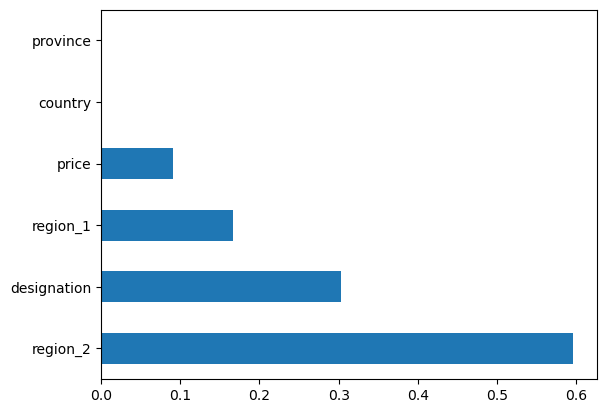

In [68]:
missing_percen1[missing_percen1 != 0].plot(kind='barh') 

Percentage of missing values per column in Data File2.

In [72]:
missing_percen2 = df2.isnull().sum().sort_values(ascending=False)/len(df2)
missing_percen2

region_2                 0.611367
designation              0.288257
taster_twitter_handle    0.240154
taster_name              0.201922
region_1                 0.163475
price                    0.069215
country                  0.000485
province                 0.000485
variety                  0.000008
Unnamed: 0               0.000000
description              0.000000
points                   0.000000
title                    0.000000
winery                   0.000000
dtype: float64

In [74]:
type(missing_percen2)

pandas.core.series.Series

<Axes: >

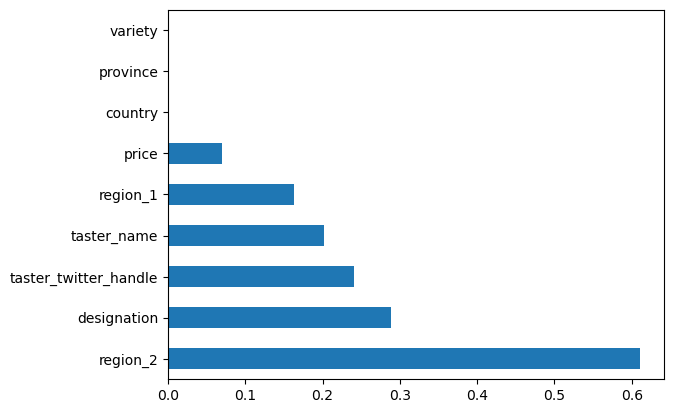

In [76]:
missing_percen2[missing_percen2 != 0].plot(kind='barh')

# Exploratory Analysis And Visualization:
Columns we'll analyze:
- Country
- Designation
- Point
- Price
- Province
- Variety

# In Data File1 Have

In [80]:
df1.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [82]:
countrys = df1.country.unique()
countries_with_data = df1[df1['country'].notna()].country.unique() ## remove NaN data
print(len(countries_with_data))
countries_with_data

48


array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [84]:
wines_from_country = df1.country.value_counts()
wines_province = df1.province.value_counts()
print(len(wines_from_country))

48


In [86]:
country_counts = df1['country'].value_counts().head(10)

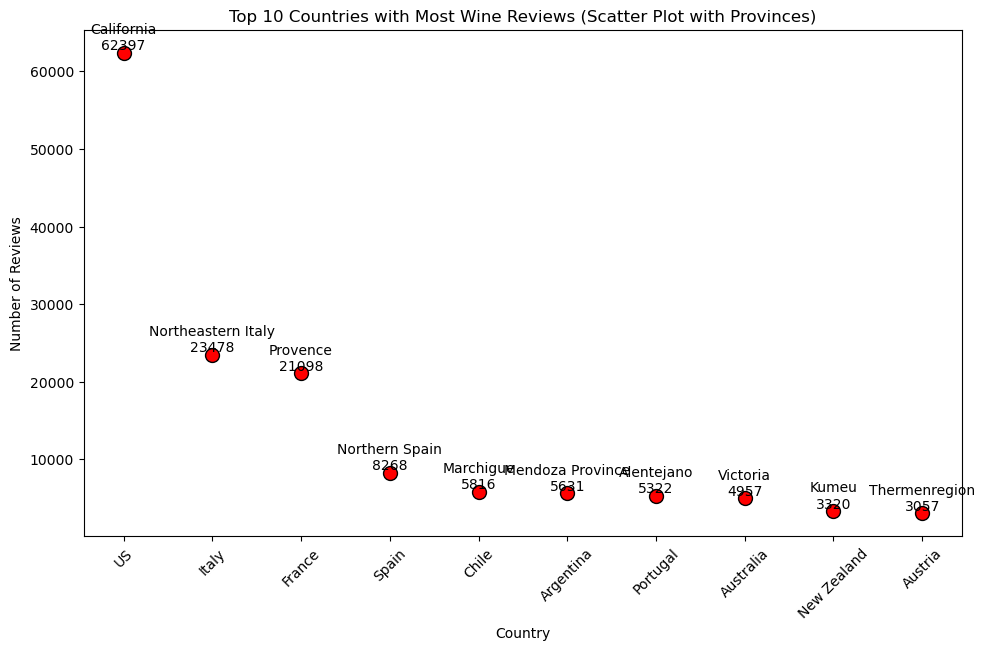

In [162]:

# สร้าง scatter plot
plt.figure(figsize=(10, 6))

# ทำ scatter plot โดยใช้ประเทศเป็นแกน X, จำนวนการรีวิวเป็นแกน Y
plt.scatter(country_counts.index, country_counts.values, color='red', s=100, edgecolors='black')

# ตั้งชื่อกราฟและป้ายแกน
plt.title('Top 10 Countries with Most Wine Reviews (Scatter Plot with Provinces)')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')

# เพิ่ม label ในแต่ละจุดและแสดงจังหวัด (province)
for i, country in enumerate(country_counts.index):
    province = df1[df1['country'] == country]['province'].iloc[0] 
    plt.text(country_counts.index[i], country_counts.values[i] + 0.2, f"{province}\n{country_counts.values[i]}", ha='center', va='bottom', fontsize=10)

# แสดงกราฟ
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Find the most popular score and how is it distributed in Data File1.

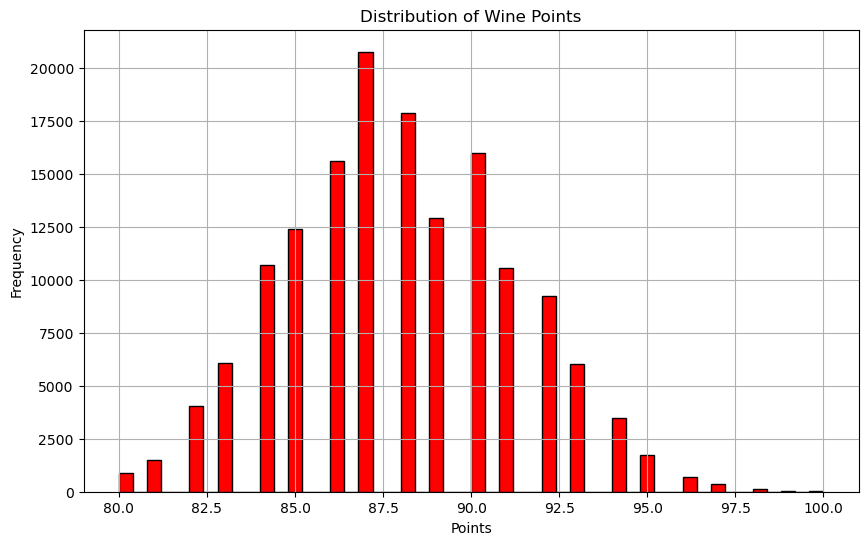

In [160]:
plt.figure(figsize=(10,6))
df1['points'].hist(bins=50,color='red',edgecolor='black')
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

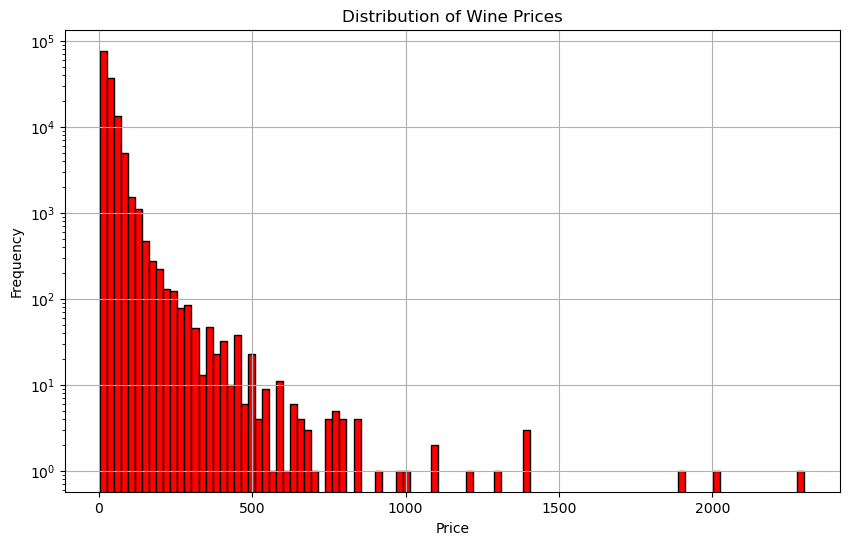

In [158]:
plt.figure(figsize=(10,6))
df1['price'].hist(bins=100,color='red',edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.yscale('log')

plt.show()

Relationships between wine scores and price.

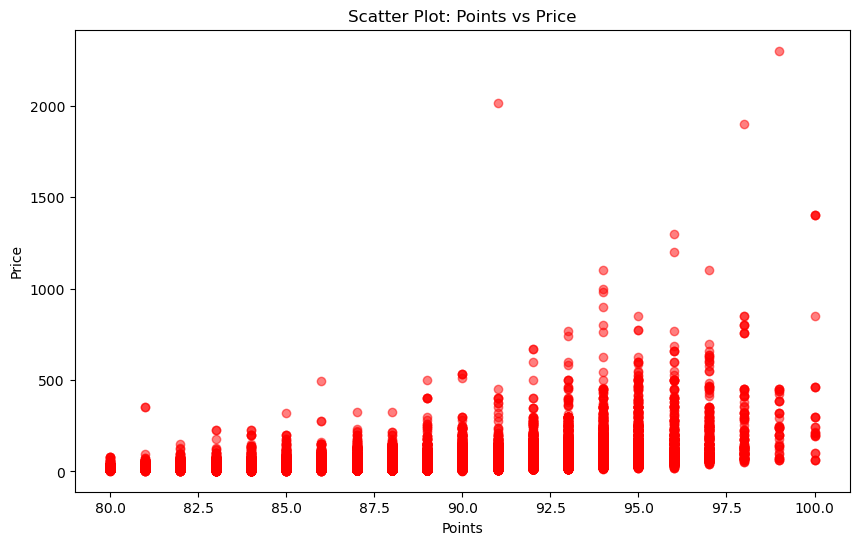

In [154]:
plt.figure(figsize=(10,6))
plt.scatter(df1['points'],df1['price'],alpha=0.5,color='red')
plt.title('Scatter Plot: Points vs Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

The most popular variety of wine.

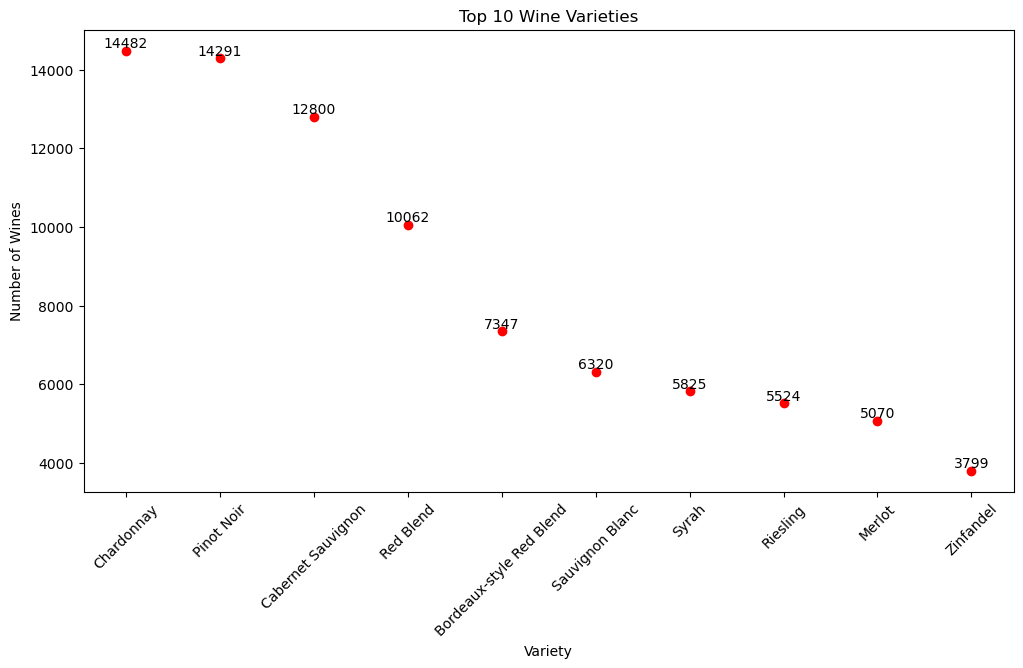

In [156]:
plt.figure(figsize=(12,6))
top_10_varieties = df1['variety'].value_counts().head(10)
plt.scatter(top_10_varieties.index,top_10_varieties.values,color='red',marker='o')

for i, value in enumerate(top_10_varieties.values):
    plt.text(top_10_varieties.index[i], value, str(value), ha='center', va='bottom')


plt.title('Top 10 Wine Varieties')
plt.xlabel('Variety')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.show()

# In Data File2 Have:

In [102]:
df2.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [104]:
countrys2 = df2.country.unique()
countries_with_data2 = df2[df2['country'].notna()].country.unique() ## remove NaN data
print(len(countries_with_data2))
countries_with_data2

43


array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Egypt'], dtype=object)

In [106]:
wines_from_country2 = df2.country.value_counts()
wines_province2 = df2.province.value_counts()
print(len(wines_from_country2))

43


In [108]:
country_counts2 = df2['country'].value_counts().head(10)

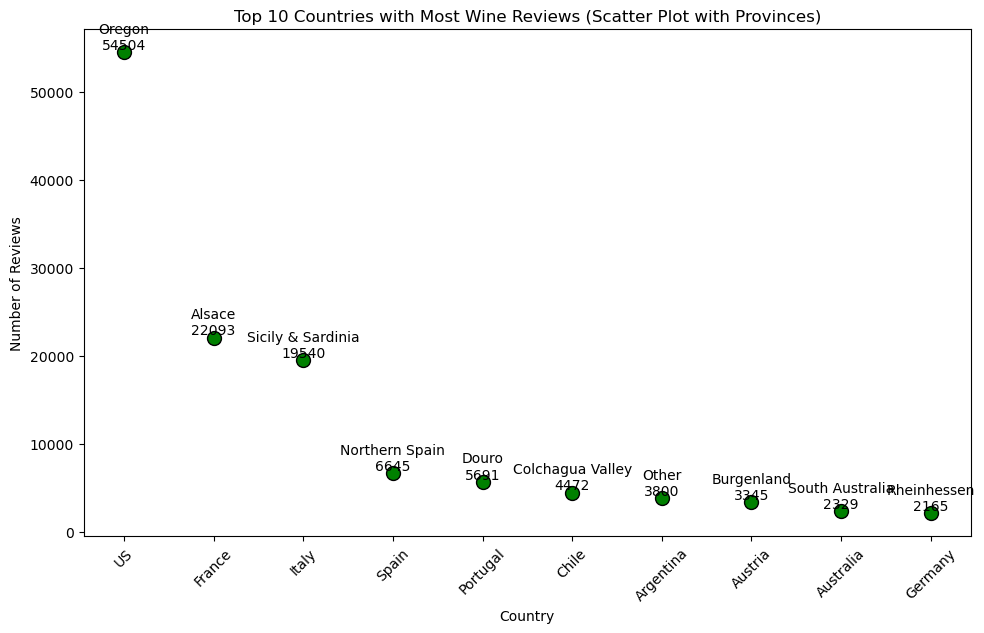

In [110]:

# สร้าง scatter plot
plt.figure(figsize=(10, 6))

# ทำ scatter plot โดยใช้ประเทศเป็นแกน X, จำนวนการรีวิวเป็นแกน Y
plt.scatter(country_counts2.index, country_counts2.values, color='green', s=100, edgecolors='black')

# ตั้งชื่อกราฟและป้ายแกน
plt.title('Top 10 Countries with Most Wine Reviews (Scatter Plot with Provinces)')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')

# เพิ่ม label ในแต่ละจุดและแสดงจังหวัด (province)
for i, country in enumerate(country_counts2.index):
    province = df2[df2['country'] == country]['province'].iloc[0] 
    plt.text(country_counts2.index[i], country_counts2.values[i] + 0.2, f"{province}\n{country_counts2.values[i]}", ha='center', va='bottom', fontsize=10)

# แสดงกราฟ
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

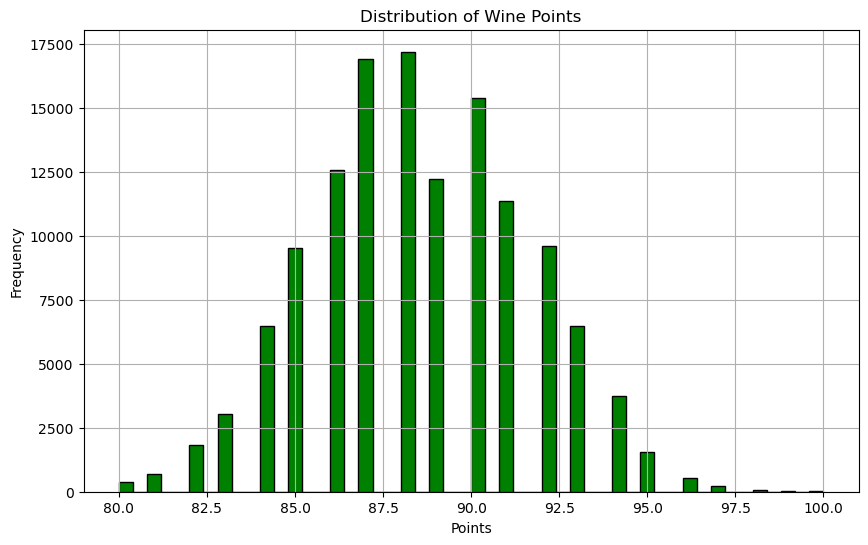

In [111]:
plt.figure(figsize=(10,6))
df2['points'].hist(bins=50,color='green',edgecolor='black')
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

Relationships between wine scores and price.

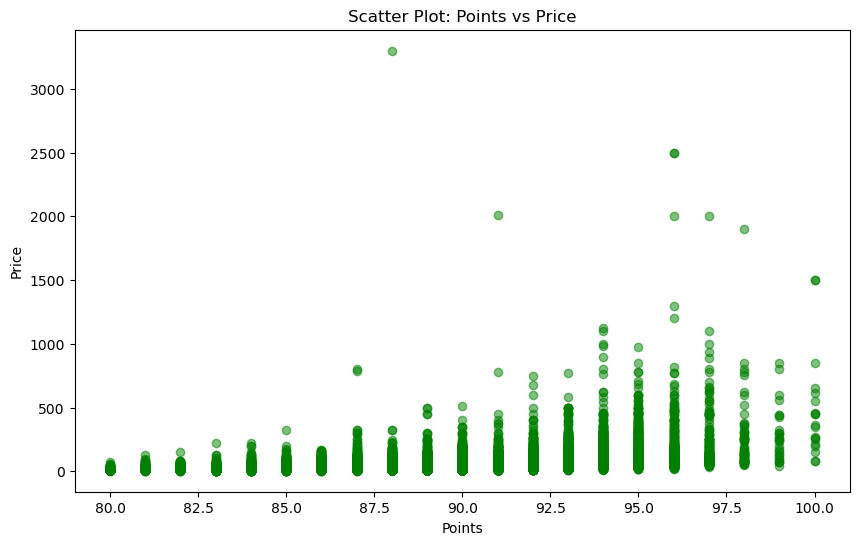

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(df2['points'],df2['price'],alpha=0.5,color='green')
plt.title('Scatter Plot: Points vs Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

The most popular variety of wine.

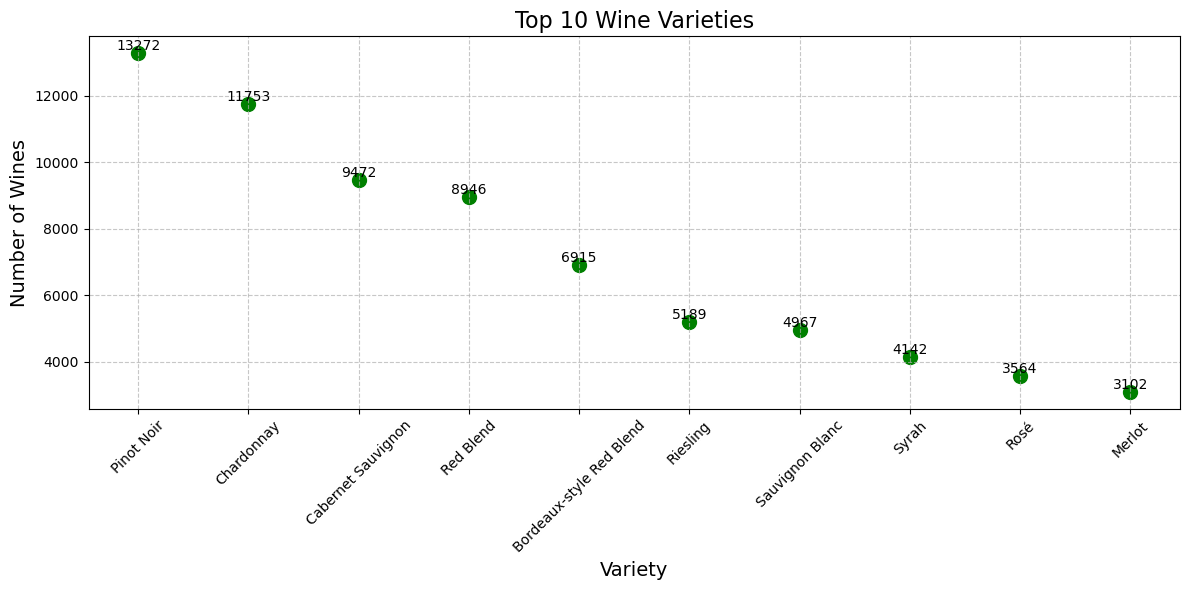

In [135]:
plt.figure(figsize=(12,6))
top_10_varieties2 = df2['variety'].value_counts().head(10)



# วาดกราฟแบบ scatter และกำหนดสี
plt.scatter(top_10_varieties2.index, top_10_varieties2.values, marker='o', c='green', s=100)

# เพิ่มค่าตัวเลขเหนือจุด
for i, value in enumerate(top_10_varieties2.values):
    plt.text(top_10_varieties2.index[i], value, str(value), ha='center', va='bottom')

# ปรับแต่งกราฟเพิ่มเติม
plt.title('Top 10 Wine Varieties', fontsize=16)
plt.xlabel('Variety', fontsize=14)
plt.ylabel('Number of Wines', fontsize=14)
plt.xticks(rotation=45)

# เพิ่มเส้นกริดให้อ่านง่ายขึ้น
plt.grid(True, linestyle='--', alpha=0.7)

# ปรับขอบกราฟ
plt.tight_layout()

plt.show()

The most taster reviews wine.

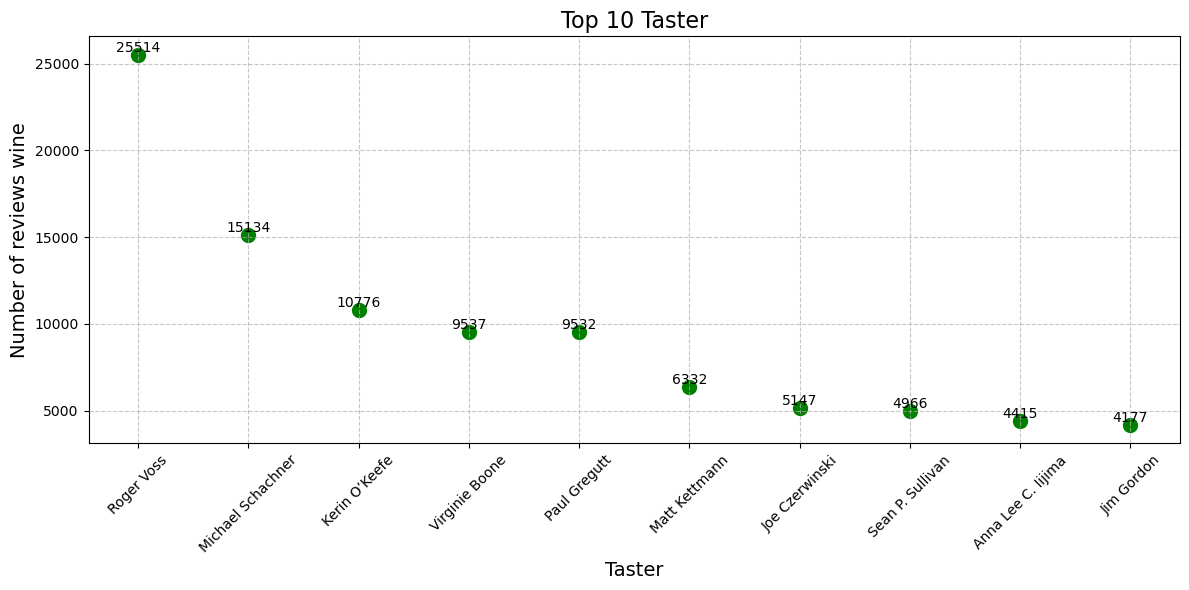

In [151]:
plt.figure(figsize=(12,6))
top_10_taster = df2['taster_name'].value_counts().head(10)



# วาดกราฟแบบ scatter และกำหนดสี
plt.scatter(top_10_taster.index, top_10_taster.values, marker='o', c='green', s=100)

# เพิ่มค่าตัวเลขเหนือจุด
for i, value in enumerate(top_10_taster.values):
    plt.text(top_10_taster.index[i], value, str(value), ha='center', va='bottom')

# ปรับแต่งกราฟเพิ่มเติม
plt.title('Top 10 Taster', fontsize=16)
plt.xlabel('Taster', fontsize=14)
plt.ylabel('Number of reviews wine', fontsize=14)
plt.xticks(rotation=45)

# เพิ่มเส้นกริดให้อ่านง่ายขึ้น
plt.grid(True, linestyle='--', alpha=0.7)

# ปรับขอบกราฟ
plt.tight_layout()

plt.show()

# Ask & answer the questions
   1.Which are the top 10 countries that produce the most wine, and from which regions or provinces do they produce it?
    
   2.What is the most popular score and how is it distributed?

   3.What is the average price or price range that is usually found?

   4.Are there any relationships between wine scores and price (e.g., will a higher price lead to a higher score)?

   5.Which types of wine are the most popular?

   6.Which tasters review the most wines?


# Summary and Conclusion
Insights:
- It have NaN in data country
- In Data File1 is haven't Taster info.
- Most review about wine is California
- The price of a wine does not necessarily lead to higher points. There is no strong evidence that expensive wines automatically receive higher ratings. Many affordable wines achieve excellent scores, while some high-priced options may receive modest ratings. Quality depends on various factors beyond price, including vineyard practices, winemaking techniques, vintage conditions, and regional characteristics.
- Roger Voss is the most taster wines reviews